<a href="https://colab.research.google.com/github/dmzapata1/Ciencia_de_Datos/blob/main/Proyecto_Ensambles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


In [3]:
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }
df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


In [4]:
# Separamos en x, y
x = df[['gmat', 'gpa', 'work_experience']]
y = df['admitted']

In [5]:
x.head(1)

,gmat,gpa,work_experience
0,780,4.0,3


In [6]:
y.head(1)

0    1
Name: admitted, dtype: int64

In [7]:
# conjunto de entrenamiento y de prueba
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42, shuffle = True)

In [8]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((28, 3), (28,), (12, 3), (12,))

In [9]:
# Instanciamos los modelos
svm = SVC()

In [10]:
arbol = DecisionTreeClassifier(max_depth=2)

# Hard (Mediante Votos)

In [12]:
# Ensamble
votos = VotingClassifier(
    estimators=[('svm',svm),('arbol',arbol)],
    voting = 'hard'
)

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
for i in (svm,arbol,votos):
  i.fit(x_train,y_train)
  y_pred = i.predict(x_test)
  print(i.__class__.__name__,
        accuracy_score(y_test,y_pred))

SVC 0.6666666666666666
DecisionTreeClassifier 0.8333333333333334
VotingClassifier 0.9166666666666666


# Soft (Mediante probabilidades)

In [16]:
svm = SVC(probability=True)

In [17]:
votos = VotingClassifier(
    estimators=[('svm',svm),('arbol',arbol)],
    voting = 'soft'
)

In [18]:
for i in (svm,arbol,votos):
  i.fit(x_train,y_train)
  y_pred = i.predict(x_test)
  print(i.__class__.__name__,
        accuracy_score(y_test,y_pred))

SVC 0.6666666666666666
DecisionTreeClassifier 0.8333333333333334
VotingClassifier 0.8333333333333334


# Adaboost

In [20]:
from sklearn.ensemble import AdaBoostClassifier

In [21]:
ada = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=100, learning_rate=0.1)

In [22]:
ada.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.1,
                   n_estimators=100)

In [23]:
y_pred = ada.predict(x_test)

In [25]:
accuracy_score(y_test,y_pred)

0.9166666666666666

# Boosting con gradiente GradientBoost

In [53]:
m=100

In [54]:
x = np.linspace(-0.5,0.5,m)

In [55]:
x

array([-0.5       , -0.48989899, -0.47979798, -0.46969697, -0.45959596,
       -0.44949495, -0.43939394, -0.42929293, -0.41919192, -0.40909091,
       -0.3989899 , -0.38888889, -0.37878788, -0.36868687, -0.35858586,
       -0.34848485, -0.33838384, -0.32828283, -0.31818182, -0.30808081,
       -0.2979798 , -0.28787879, -0.27777778, -0.26767677, -0.25757576,
       -0.24747475, -0.23737374, -0.22727273, -0.21717172, -0.20707071,
       -0.1969697 , -0.18686869, -0.17676768, -0.16666667, -0.15656566,
       -0.14646465, -0.13636364, -0.12626263, -0.11616162, -0.10606061,
       -0.0959596 , -0.08585859, -0.07575758, -0.06565657, -0.05555556,
       -0.04545455, -0.03535354, -0.02525253, -0.01515152, -0.00505051,
        0.00505051,  0.01515152,  0.02525253,  0.03535354,  0.04545455,
        0.05555556,  0.06565657,  0.07575758,  0.08585859,  0.0959596 ,
        0.10606061,  0.11616162,  0.12626263,  0.13636364,  0.14646465,
        0.15656566,  0.16666667,  0.17676768,  0.18686869,  0.19

In [56]:
y = 25*x**2 + np.random.random(m)-0.5

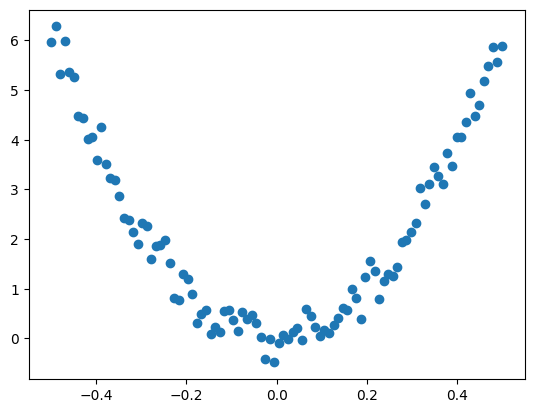

In [57]:
plt.scatter(x,y)

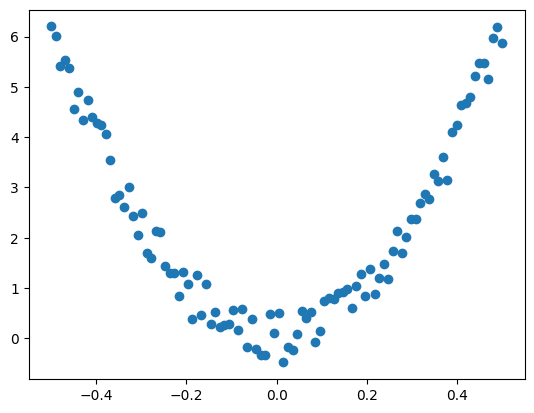

In [58]:
m = 100
x = np.linspace(-0.5,0.5,m)
y = 25*x**2 + np.random.random(m) -0.5
plt.scatter(x,y)

In [59]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2,
                                n_estimators=3,
                                learning_rate=1.0)

In [60]:
x_reshaped = np.array(x).reshape(-1, 1)


In [61]:
gbrt.fit(x_reshaped,y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

In [62]:
#En este caso utilizaremos el error medio cuadrado.
from sklearn.metrics import mean_squared_error
x_train, x_test, y_train, y_test = train_test_split(x_reshaped,y)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(x_train, y_train)

errores = [mean_squared_error(y_test,y_pred) for y_pred in gbrt.staged_predict(x_test)]
mejor = np.argmin(errores)
mejor

83

In [64]:
y_pred = gbrt.predict(x_test)

In [65]:
y_pred

array([ 0.32435472,  1.13577204,  6.14531234,  4.64155592,  3.16859077,
        4.68041656,  0.41315608, -0.11227234,  1.97181261,  2.46755206,
        2.63024064,  5.2181114 , -0.15923837,  1.22079822,  4.24518722,
        0.81418232, -0.1298739 ,  1.17748553,  1.13577204,  0.73629129,
        1.71841216,  5.9951683 ,  0.78700943,  4.36581048,  1.9011355 ])

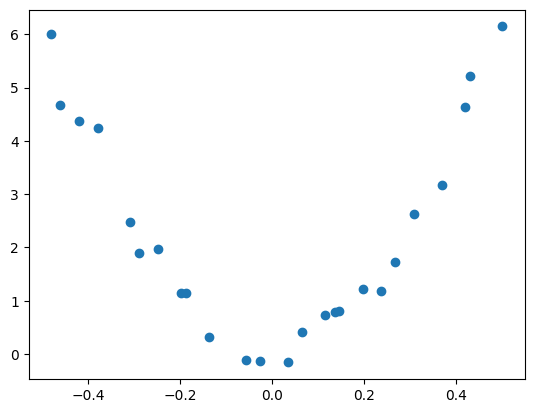

In [66]:
plt.scatter(x_test,y_pred)

In [67]:
#Evaluar el early stopping automáticamente con XGBRegressor
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

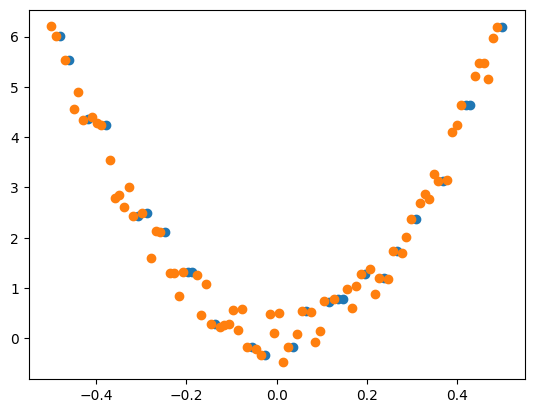

In [68]:
plt.scatter(x_test,y_pred)
plt.scatter(x_train,y_train)

In [69]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train,
       eval_set=[(x_test,y_test)], early_stopping_rounds=1)
y_pred = xgb.predict(x_test)

[0]	validation_0-rmse:1.43760


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:1.08193
[2]	validation_0-rmse:0.85038
[3]	validation_0-rmse:0.67294
[4]	validation_0-rmse:0.55118
[5]	validation_0-rmse:0.47260
[6]	validation_0-rmse:0.41501
[7]	validation_0-rmse:0.38720
[8]	validation_0-rmse:0.36856
[9]	validation_0-rmse:0.35818
[10]	validation_0-rmse:0.35545
[11]	validation_0-rmse:0.35683


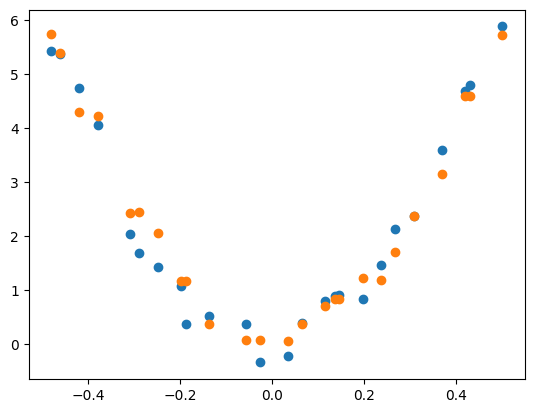

In [70]:
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_pred)

In [74]:
#Importa los regresores necesarios StackingRegressor,LinearRegression, RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

#Generar el árbol de decisión
arbol = DecisionTreeRegressor(max_depth=20)
#Generar la regresión lineal
lineal = LinearRegression()
#Generar el bosque aleatorio
random = RandomForestRegressor()
#Genera los tres modelos
stacking = StackingRegressor(estimators=[("arbol", arbol),
                            ("lineal", lineal),
                          ("random", random)])
#Utiliza Stacking
stacking.fit(x_train, y_train)

StackingRegressor(estimators=[('arbol', DecisionTreeRegressor(max_depth=20)),
                              ('lineal', LinearRegression()),
                              ('random', RandomForestRegressor())])

In [75]:
y_pred = stacking.predict(x_test)

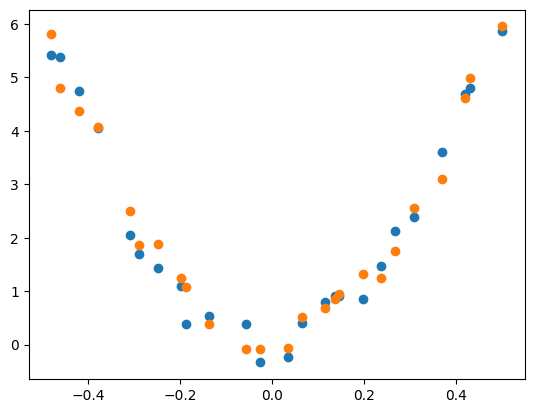

In [76]:
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_pred)